In [1]:
import sys
import csv
import urllib
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDiA
from sklearn.metrics.pairwise import cosine_similarity
import math
%matplotlib inline

In [2]:
def cosine(matrix1, matrix2):
    return matrix2.dot(matrix1.T)

In [3]:
def total_score(cosine_df, threshold):
    total = cosine_df.shape[0] * cosine_df.shape[1]
    similar = 0
    for i, row in cosine_df.iterrows():
        for j in row:
            if j > threshold:
                similar += 1
    return similar/total

In [4]:
def avg_cosine(cosine_df):
    total = cosine_df.shape[0] * cosine_df.shape[1]
    similar_sum = 0
    for i, row in cosine_df.iterrows():
        for j in row:
            similar_sum += j
    return similar_sum/total

In [5]:
def norm_avg_cos(cosine_df, num):
    return avg_cosine(cosine_df)/num

In [6]:
svd_all = pd.read_csv('svd.csv')
meade_svd = svd_all[:179]
anaya_svd = svd_all[179:307]
amlo_svd = svd_all[307:]

In [7]:
avg_cosine(cosine(amlo_svd, amlo_svd))

0.40958894680876623

In [8]:
amlo_row = [avg_cosine(cosine(amlo_svd, amlo_svd)),
            avg_cosine(cosine(amlo_svd, anaya_svd)), 
            avg_cosine(cosine(amlo_svd, meade_svd))]

anaya_row = [None, 
             avg_cosine(cosine(anaya_svd, anaya_svd)), 
             avg_cosine(cosine(anaya_svd, meade_svd))]

meade_row = [None,
             None,
             avg_cosine(cosine(meade_svd, meade_svd))]

In [9]:
amlo_row_b = [avg_cosine(cosine(amlo_svd, anaya_svd)), 
              avg_cosine(cosine(amlo_svd, meade_svd))]

anaya_row_b = [None, 
               avg_cosine(cosine(anaya_svd, meade_svd))]

In [10]:
avg_cosine_list = [amlo_row, anaya_row, meade_row]
avg_cosine_df = pd.DataFrame(avg_cosine_list, columns=['AMLO', 'ANAYA', 'MEADE'], index= ['AMLO', 'ANAYA', 'MEADE'])

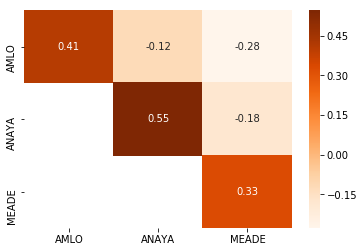

In [11]:
sns.heatmap(avg_cosine_df.round(3), annot=True, cmap="Oranges")
plt.show()

In [12]:
avg_cosine_list_b = [amlo_row_b, anaya_row_b]
avg_cosine_df_b = pd.DataFrame(avg_cosine_list_b, columns=['ANAYA', 'MEADE'], index= ['AMLO', 'ANAYA'])

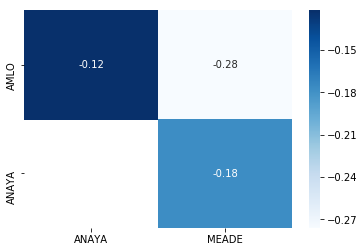

In [13]:
sns.heatmap(avg_cosine_df_b.round(3), annot=True, cmap="Blues")
plt.show()

In [14]:
amlo_svd

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
307,-0.428961,0.255689,0.338007,0.688991,0.322497,0.215915,0.066015,-0.074724,-0.013061,0.030384
308,-0.547900,0.344869,0.415089,-0.429006,0.211518,0.407600,0.039573,-0.097948,0.026244,-0.042422
309,-0.654976,0.495553,0.330205,-0.205938,0.173107,0.038579,-0.102886,0.149784,-0.328473,0.040222
310,-0.719289,0.279937,0.339195,0.308939,0.179279,-0.107801,-0.001430,0.325702,-0.157670,-0.138042
311,-0.760895,0.361957,0.201137,-0.010666,0.096478,-0.257442,-0.200850,0.290269,-0.212647,0.063695
312,-0.713983,0.210739,0.392490,-0.232617,-0.079359,0.237822,-0.019461,-0.123765,-0.251643,-0.309484
313,-0.566043,0.478864,0.346400,-0.277266,0.311688,0.215040,0.177315,0.140928,-0.221886,-0.097412
314,-0.469903,0.383772,-0.191708,-0.296009,0.290067,-0.171490,0.231887,-0.132091,-0.067294,0.564128
315,-0.643958,0.012119,0.238637,0.256253,-0.334447,-0.478300,0.075262,0.215515,-0.253647,0.074055
316,-0.674825,0.429884,0.296038,0.054240,-0.202309,-0.116958,-0.394000,0.181339,-0.160562,0.026881


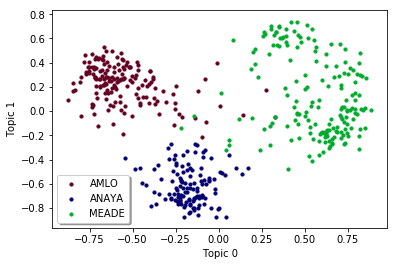

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(amlo_svd.topic0, amlo_svd.topic1, s=10, c='#650021', marker="o", label='AMLO')
ax1.scatter(anaya_svd.topic0, anaya_svd.topic1, s=10, c='#040273', marker="o", label='ANAYA')
ax1.scatter(meade_svd.topic0, meade_svd.topic1, s=10, c='#02ab2e', marker="o", label='MEADE')
plt.xlabel("Topic 0")
plt.ylabel("Topic 1")
plt.legend(loc='best', shadow=True, fancybox=True)
plt.show()

In [16]:
def get_scatter(topic_1, topic_2):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(amlo_svd[topic_1], amlo_svd[topic_2], s=30, c='#650021', marker="o", label='AMLO')
    ax1.scatter(anaya_svd[topic_1], anaya_svd[topic_2], s=30, c='#040273', marker="o", label='ANAYA')
    ax1.scatter(meade_svd[topic_1], meade_svd[topic_2], s=30, c='#02ab2e', marker="o", label='MEADE')
    plt.xlabel(topic_1)
    plt.ylabel(topic_2)
    plt.legend(loc='best', shadow=True, fancybox=True)
    return plt.show()

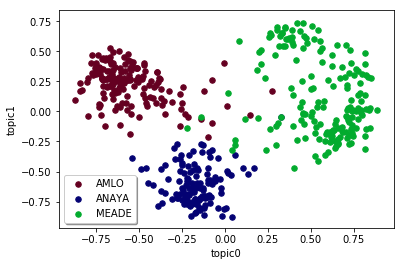

In [17]:
get_scatter('topic0', 'topic1')

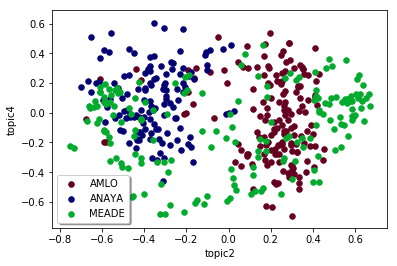

In [18]:
get_scatter('topic2', 'topic4')

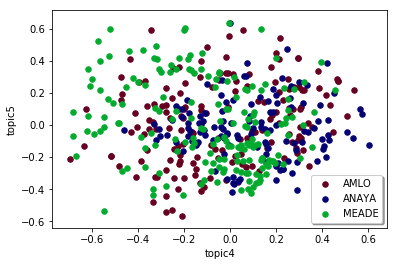

In [36]:
get_scatter('topic4', 'topic5')

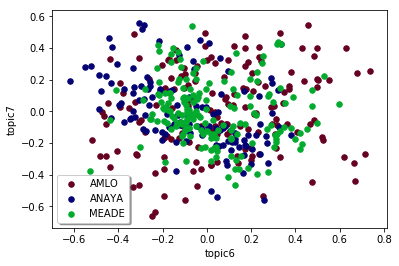

In [37]:
get_scatter('topic6', 'topic7')

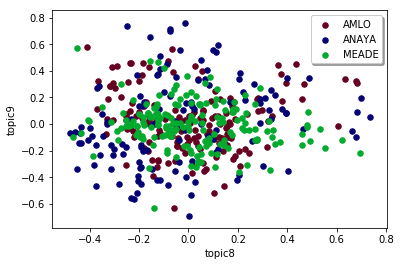

In [38]:
get_scatter('topic8', 'topic9')